In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train_df=pd.read_csv("Dataset/train.csv")

In [3]:
build_strct=pd.read_csv("Dataset/Building_Structure.csv")
build_ownshp=pd.read_csv("Dataset/Building_Ownership_Use.csv")
print(build_strct.shape)
print(build_ownshp.shape)

(1052948, 29)
(1052948, 17)


In [4]:
test_df=pd.read_csv("Dataset/test.csv")
print(test_df.shape)

(421175, 13)


In [5]:
train_final=train_df.merge(build_strct,on=['building_id','district_id','vdcmun_id'],how='left')
train_final=train_final.merge(build_ownshp,on=['building_id','district_id','vdcmun_id','ward_id'],how='left')

In [6]:
test_final=test_df.merge(build_strct,on=['building_id','district_id','vdcmun_id'],how='left')
test_final=test_final.merge(build_ownshp,on=['building_id','district_id','vdcmun_id','ward_id'],how='left')

In [7]:
damage_dict={'Grade 5':5,'Grade 4':4,'Grade 3':3,'Grade 2':2,'Grade 1':1}
def mapping(n):
    return damage_dict[n]
df1=map(mapping,train_final['damage_grade'])
x=list(df1)
train_final['damage_grade']=x

In [8]:
cols=['height_ft_pre_eq','height_ft_post_eq','has_secondary_use','district_id','has_geotechnical_risk_landslide','vdcmun_id']
train_final=train_final.drop(cols,axis=1)
test_final=test_final.drop(cols,axis=1)


In [9]:
x1=train_final['has_repair_started'].value_counts()
x2=train_final['count_families'].value_counts()
print(x1)
print(x2)
train_final['has_repair_started'].fillna(x1.index[0],inplace=True)
train_final['count_families'].fillna(x2.index[0],inplace=True)

0.0    409222
1.0    189122
Name: has_repair_started, dtype: int64
1.0     547837
0.0      50659
2.0      27771
3.0       4185
4.0        939
5.0        262
6.0         73
7.0         19
8.0          9
9.0          5
11.0         1
Name: count_families, dtype: int64


In [10]:
x3=test_final['has_repair_started'].value_counts()
#print(x3)
test_final['has_repair_started'].fillna(x3.index[0],inplace=True)

In [11]:
print(train_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 47 columns):
area_assesed                              631761 non-null object
building_id                               631761 non-null object
damage_grade                              631761 non-null int64
has_geotechnical_risk                     631761 non-null float64
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_other               631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        631761 non-null float64
ward_id                                   631761 non-null int64
count_floors_pre_eq                       631761 non-null int64
count_floors_post_eq                      631761 no

In [12]:
print(test_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421175 entries, 0 to 421174
Data columns (total 46 columns):
area_assesed                              421175 non-null object
building_id                               421175 non-null object
has_geotechnical_risk                     421175 non-null float64
has_geotechnical_risk_fault_crack         421175 non-null int64
has_geotechnical_risk_flood               421175 non-null int64
has_geotechnical_risk_land_settlement     421175 non-null int64
has_geotechnical_risk_liquefaction        421175 non-null int64
has_geotechnical_risk_other               421175 non-null int64
has_geotechnical_risk_rock_fall           421175 non-null int64
has_repair_started                        421175 non-null float64
ward_id                                   421175 non-null int64
count_floors_pre_eq                       421175 non-null int64
count_floors_post_eq                      421175 non-null int64
age_building                              421175 no

In [13]:
def string_to_onehot(x,data):
    for i in range(0,len(x),2):
        x1=pd.get_dummies(data[x[i]])
        #print(x1.columns)
        x2=pd.get_dummies(data[x[i+1]])
        #print(x2.columns)
        if (i==0):
            q=pd.concat([data,x1,x2],axis=1)
            #print(q.columns)
            #print(len(q.columns))
        else:
            q=pd.concat([q,x1,x2],axis=1)
            #print(q.columns)
            #print(len(q.columns))
    if (i!=len(x)-1):
        i+=1
        x1=pd.get_dummies(data[x[i]])
        q=pd.concat([q,x1],axis=1)
    q.drop(x,inplace=True,axis=1)
    return q

In [14]:
x=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position',                                  
'plan_configuration','area_assesed','condition_post_eq','legal_ownership_status']
print(train_final.shape)
train_final=string_to_onehot(x,train_final)
print(train_final.shape)
print(test_final.shape)
test_final=string_to_onehot(x,test_final)
print(test_final.shape)

(631761, 47)
(631761, 92)
(421175, 46)
(421175, 91)


In [15]:
print(train_final.head(10))

   building_id  damage_grade  has_geotechnical_risk  \
0  24385bfd2a2             4                    0.0   
1  405d1bbebbf             2                    0.0   
2  351d9bc71f6             1                    0.0   
3  2be3a971166             5                    0.0   
4  34c7d073ea6             3                    0.0   
5  1f54965821f             5                    0.0   
6  2beb42eaeee             2                    1.0   
7  25e8adfd09a             5                    0.0   
8  1e96b58fa58             1                    0.0   
9  392cbd772c9             3                    0.0   

   has_geotechnical_risk_fault_crack  has_geotechnical_risk_flood  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3                                  0                            0   
4                                  0             

In [16]:
train_df=train_final.copy()
y=train_df['damage_grade']
train_df.drop(['damage_grade','building_id'],inplace=True,axis=1)
test_df=test_final.copy()
test_df.drop(['building_id'],inplace=True,axis=1)

In [17]:
print(train_df.shape)
print(test_df.shape)

(631761, 90)
(421175, 90)


In [18]:
damage_dict2={1:0,2:1,3:2,4:3,5:4}
y=y.map(damage_dict2)

In [19]:
from sklearn.model_selection import train_test_split,cross_val_score
train_X,valid_X,train_y,valid_y=train_test_split(train_df,y,test_size=0.1)

In [20]:
print(train_X.shape)

(568584, 90)


In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
def kfold(model,train_X,train_y,variables):
    model.fit(train_X,train_y)
    predicted=model.predict(train_X)
    print("the f1 accuracy on the training data is {0}".format(f1_score(train_y,predicted,average='weighted')))
    #kf=KFold(train_X[variables].shape[0],n_splits=10)
    kf=KFold(n_splits=10)
    f1=[]
    count=0;
    for train,test in kf.split(train_X):
        train_data=train_X[variables].iloc[train,:]
        test_data=train_X[variables].iloc[test,:]
        y_train=train_y.iloc[train]
        y_test=train_y.iloc[test]
        model.fit(train_data,y_train)
        predictions=model.predict(test_data)
        score=f1_score(y_test,predictions,average='weighted')
        f1.append(score)
        count+=1
    print(count)
    print("the mean f1_score is {0}".format(np.mean(f1)))

In [66]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier(max_depth=20,min_samples_split=30)
variables=train_X.columns
kfold(clf1,train_X,train_y,variables)

the f1 accuracy on the training data is 0.7836726815256027
10
the mean f1_score is 0.7419131349980395


In [76]:
clf1.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
print(len(variables))
print(clf1.n_features_)

90
90


In [67]:
clf3=DecisionTreeClassifier(max_depth=20,min_samples_split=20)
variables=train_X.columns
kfold(clf3,train_X,train_y,variables)

the f1 accuracy on the training data is 0.7889399210705352
10
the mean f1_score is 0.741068671351041


In [27]:
dict2={0:'Grade 1',1:'Grade 2',2:'Grade 3',3:'Grade 4',4:'Grade 5'}

In [89]:
test_y=clf1.predict(test_df)
y=pd.Series(test_y)
y=y.map(dict2)
build=pd.Series(test_final['building_id'])
submit4=pd.concat([build,y],axis=1)
submit4.set_index(['building_id'],inplace=True)
submit4.columns=['damage_grade']
print(submit4.head(10))
submit4.to_csv("Submission4.csv")
print(submit4.head(10))

            damage_grade
building_id             
a3380c4f75       Grade 2
a338a4e653       Grade 5
a338a4e6b7       Grade 5
a33a6eaa3a       Grade 3
a33b073ff6       Grade 5
6604e4896c6      Grade 4
a33b07430f       Grade 3
a33c386cf3       Grade 5
a33c386ee7       Grade 2
a33c38700f       Grade 4
            damage_grade
building_id             
a3380c4f75       Grade 2
a338a4e653       Grade 5
a338a4e6b7       Grade 5
a33a6eaa3a       Grade 3
a33b073ff6       Grade 5
6604e4896c6      Grade 4
a33b07430f       Grade 3
a33c386cf3       Grade 5
a33c386ee7       Grade 2
a33c38700f       Grade 4


In [81]:
#print(submit4.head(10))


   building_id  0
0   a3380c4f75  1
1   a338a4e653  4
2   a338a4e6b7  4
3   a33a6eaa3a  2
4   a33b073ff6  4
5  6604e4896c6  3
6   a33b07430f  2
7   a33c386cf3  4
8   a33c386ee7  1
9   a33c38700f  3
             0
building_id   
a3380c4f75   1
a338a4e653   4
a338a4e6b7   4
a33a6eaa3a   2
a33b073ff6   4
6604e4896c6  3
a33b07430f   2
a33c386cf3   4
a33c386ee7   1
a33c38700f   3


In [68]:
clf3=DecisionTreeClassifier(max_depth=30,min_samples_split=20)
variables=train_X.columns
kfold(clf3,train_X,train_y,variables)

the f1 accuracy on the training data is 0.8484931716640074
10
the mean f1_score is 0.7397654740119444


In [69]:
clf3=DecisionTreeClassifier(max_depth=40,min_samples_split=20)
variables=train_X.columns
kfold(clf3,train_X,train_y,variables)

the f1 accuracy on the training data is 0.8592584705386348
10
the mean f1_score is 0.7379284144709207


In [91]:
clf4=DecisionTreeClassifier(max_depth=90,min_samples_split=80)
kfold(clf4,train_X,train_y,variables)

the f1 accuracy on the training data is 0.7976400324566056
10
the mean f1_score is 0.7483208227759562


In [103]:
clf4.fit(train_X,train_y)
test_y=clf4.predict(test_df)
y=pd.Series(test_y)
y=y.map(dict2)
build=pd.Series(test_final['building_id'])
submit6=pd.concat([build,y],axis=1)
submit6.set_index(['building_id'],inplace=True)
submit6.columns=['damage_grade']
print(submit6.head(10))
submit6.to_csv("Submission6.csv")
#print(submit6.head(10))

            damage_grade
building_id             
a3380c4f75       Grade 2
a338a4e653       Grade 5
a338a4e6b7       Grade 5
a33a6eaa3a       Grade 3
a33b073ff6       Grade 5
6604e4896c6      Grade 4
a33b07430f       Grade 3
a33c386cf3       Grade 5
a33c386ee7       Grade 2
a33c38700f       Grade 4


                      feature_importances
count_floors_post_eq             0.537956
Not damaged                      0.149394
ward_id                          0.110908
Damaged-Not used                 0.052174
has_repair_started               0.020733
plinth_area_sq_ft                0.017132
age_building                     0.013675
Not applicable                   0.011054
RC                               0.010220
Damaged-Used in risk             0.008779
                                         feature_importances
has_secondary_use_school                            0.000011
has_secondary_use_use_police                        0.000010
Building with Central Courtyard                     0.000009
has_secondary_use_gov_office                        0.000004
Damaged-Rubble Clear-New building built             0.000000
Damaged-Rubble clear                                0.000000
Damaged-Rubble unclear                              0.000000
E-shape                                           

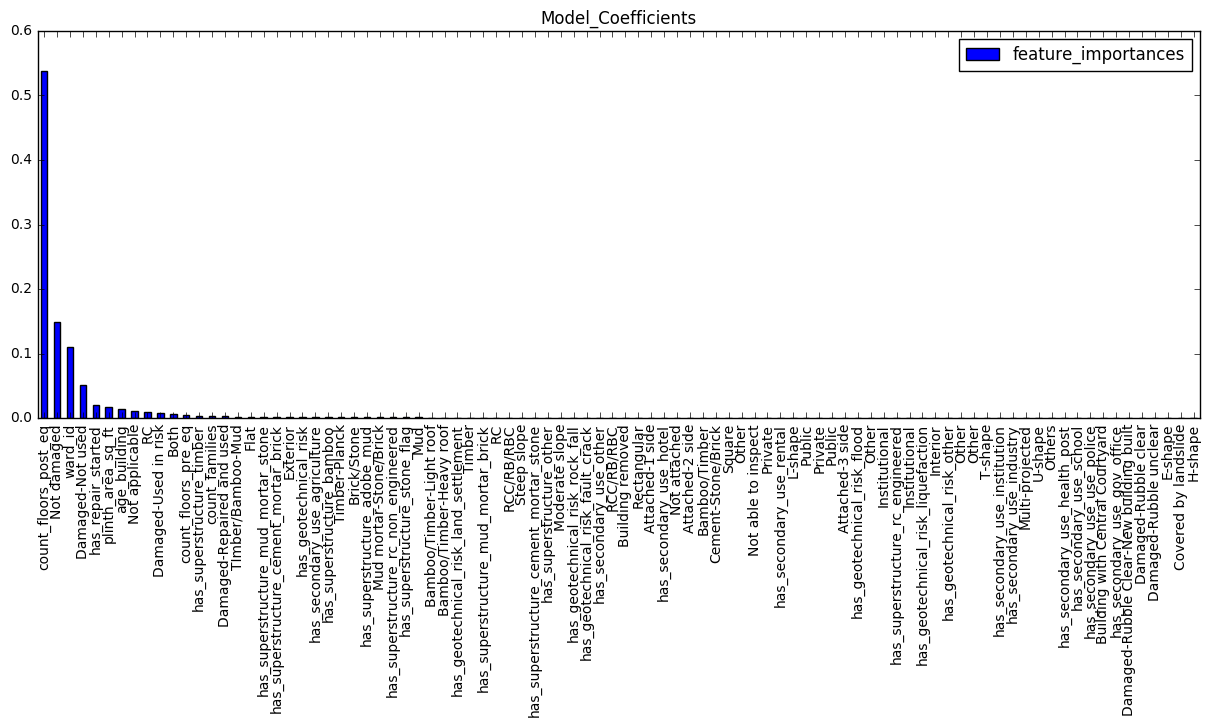

In [104]:
coef=pd.DataFrame(clf4.feature_importances_,index=train_X.columns,columns=['feature_importances'])
coef.sort_values(by=['feature_importances'],ascending=False,inplace=True)
print(coef.head(10))
print(coef.tail(10))
plt.figure(figsize=(20,5))
coef.plot(kind='bar',title='Model_Coefficients',figsize=(15,5))

In [106]:
x=['E-shape','Covered by landslide','Damaged-Rubble unclear','Damaged-Rubble clear','H-shape',
  'Damaged-Rubble Clear-New building built']
v=train_X.columns
print(len(v))
res=[]
for cols in v:
    if cols not in x:
        res.append(cols)
print(len(res))

90
84


In [107]:
clf4=DecisionTreeClassifier(max_depth=90,min_samples_split=80)
kfold(clf4,train_X,train_y,res)

the f1 accuracy on the training data is 0.7976444386489836
10
the mean f1_score is 0.7483428973783732


In [108]:
clf4.fit(train_X[res],train_y)
test_y=clf4.predict(test_df[res])
y=pd.Series(test_y)
y=y.map(dict2)
build=pd.Series(test_final['building_id'])
submit7=pd.concat([build,y],axis=1)
submit7.set_index(['building_id'],inplace=True)
submit7.columns=['damage_grade']
print(submit7.head(10))
submit7.to_csv("Submission7.csv")
#print(submit6.head(10))

            damage_grade
building_id             
a3380c4f75       Grade 2
a338a4e653       Grade 5
a338a4e6b7       Grade 5
a33a6eaa3a       Grade 3
a33b073ff6       Grade 5
6604e4896c6      Grade 4
a33b07430f       Grade 3
a33c386cf3       Grade 5
a33c386ee7       Grade 2
a33c38700f       Grade 4


In [111]:
from sklearn.naive_bayes import GaussianNB
clf5=GaussianNB()
kfold(clf5,train_X,train_y,variables)

the f1 accuracy on the training data is 0.38626276145476546
10
the mean f1_score is 0.3855476925230804


In [22]:
from sklearn.ensemble import RandomForestClassifier
clf8=RandomForestClassifier()
variables=train_X.columns
kfold(clf8,train_X,train_y,variables)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


the f1 accuracy on the training data is 0.986632210115387
10
the mean f1_score is 0.7284312393450588


In [23]:
clf9=RandomForestClassifier(max_depth=90,min_samples_split=80)
kfold(clf9,train_X,train_y,variables)

the f1 accuracy on the training data is 0.7805297949281189
10
the mean f1_score is 0.737788621623313


In [26]:
clf10=RandomForestClassifier(n_estimators=20,max_depth=90,min_samples_split=80)
kfold(clf10,train_X,train_y,variables)

the f1 accuracy on the training data is 0.7855610533522346
10
the mean f1_score is 0.7402189675518395


In [26]:
clf10=RandomForestClassifier(n_estimators=20,max_depth=90,min_samples_split=80,max_features=40)
variables=train_X.columns
kfold(clf10,train_X,train_y,variables)
clf10.fit(train_X,train_y)

the f1 accuracy on the training data is 0.8038810032477187
10
the mean f1_score is 0.7551146345009611


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features=40, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=80,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
test_y=clf10.predict(test_df)
y=pd.Series(test_y)
y=y.map(dict2)
build=pd.Series(test_final['building_id'])
submit8=pd.concat([build,y],axis=1)
submit8.set_index(['building_id'],inplace=True)
submit8.columns=['damage_grade']
print(submit8.head(10))
submit8.to_csv("Submission8.csv")

            damage_grade
building_id             
a3380c4f75       Grade 2
a338a4e653       Grade 5
a338a4e6b7       Grade 5
a33a6eaa3a       Grade 3
a33b073ff6       Grade 5
6604e4896c6      Grade 4
a33b07430f       Grade 3
a33c386cf3       Grade 5
a33c386ee7       Grade 2
a33c38700f       Grade 4
